In [ ]:
# !wget https://raw.githubusercontent.com/ad17171717/YouTube-Tutorials/main/Machine%20Learning%20with%20Python/Mean%20Squared%20Error/nba_draft_combine_all_years.csv

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
import seaborn as sns

# Suppress FutureWarnings and UserWarnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

%matplotlib inline

In [2]:
path_url = r'./nba_draft_combine_all_years.csv'
df = pd.read_csv(path_url)
df.columns

Index(['Player', 'Year', 'Weight', 'Height (No Shoes)'], dtype='object')

In [3]:
df_sub = df[['Weight', 'Height (No Shoes)']]
df_sub[:5]

,Weight,Height (No Shoes)
0,149,68.75
1,160,71.50
2,164,74.25
3,164,72.50
4,165,73.00


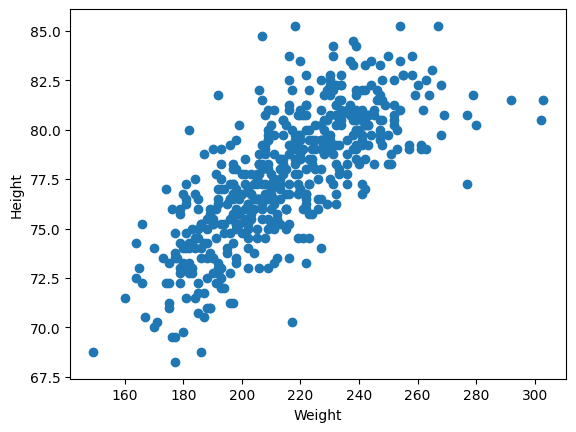

In [4]:
# Scatter Plot
plt.scatter(df_sub['Weight'], df_sub['Height (No Shoes)'])
plt.xlabel('Weight')
plt.ylabel('Height')
plt.show()

We can see a linear relationship with the two features.

In [5]:
df_sub.corr()

,Weight,Height (No Shoes)
Weight,1.000000,0.741515
Height (No Shoes),0.741515,1.000000


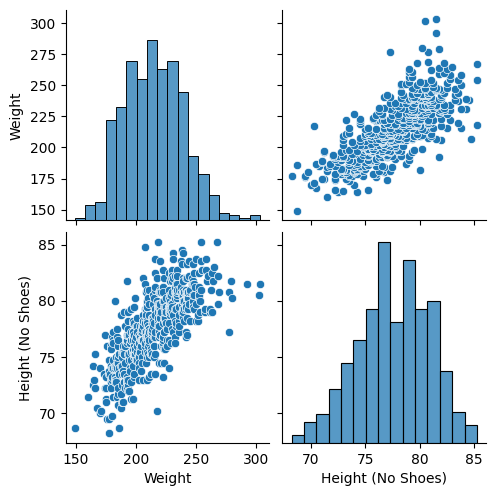

In [6]:
# Using Seaborn
sns.pairplot(df_sub);

In [7]:
# Independent and Dependent Features (Converting these into arrays)
X = df_sub[['Weight']].to_numpy()
y = df_sub['Height (No Shoes)'].to_numpy()

In [8]:
# Split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                     y,
                                                     test_size = 0.2,
                                                     random_state= 1)
len(X_train), len(X_test), len(y_train), len(y_test)

(412, 104, 412, 104)

In [9]:
X_train.shape[0] + X_test.shape[0] == X.shape[0]

True

In [10]:
# Standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_transformed = scaler.fit_transform(X_train)
X_test_transformed = scaler.transform(X_test)

In [11]:
# Import the model linear regression
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()

In [12]:
# Fit the model into the data
lr_model.fit(X_train_transformed, y_train)

LinearRegression()

In [13]:
# Make Predictions
y_preds = lr_model.predict(X_test_transformed)
y_preds[:5]

array([77.60147775, 75.12086895, 75.81543941, 77.00613164, 77.00613164])

In [14]:
print('Coefficient or slope:', lr_model.coef_)
print('Intercept:', lr_model.intercept_)

Coefficient or slope: [2.48550546]
Intercept: 77.55764563106796


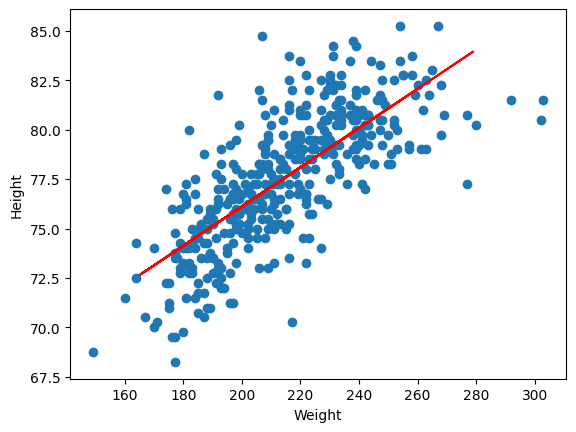

In [15]:
# Plot Training data
plt.scatter(X_train, y_train)
plt.plot(X_test, y_preds, color = 'red')
plt.xlabel('Weight')
plt.ylabel('Height')
plt.show();

Prediction of test data\
predicted height output = intercept + coef_(weights)\
y_pred_test = 77.56 + 2.49(X_test)

In [16]:
# Performance Metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error
mse = mean_squared_error(y_test, y_preds)
mae = mean_absolute_error(y_test, y_preds)
rmse = np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

4.231474499021211
1.5778326406473915
2.0570548118660357


In [17]:
# Compute R-square
from sklearn.metrics import r2_score

score = r2_score(y_test, y_preds)
score

0.5370644813594095

In [18]:
# Display adjusted R-Squared
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.5325258978433254

In [19]:
# OLS Linear Regression
import statsmodels.api as sm
model_ols = sm.OLS(y_train, X_train_transformed).fit()
sm_preds = model_ols.predict(X_test_transformed)
print(sm_preds[:5])


[ 0.04383212 -2.43677668 -1.74220622 -0.55151399 -0.55151399]


In [20]:
y_preds[:5]

array([77.60147775, 75.12086895, 75.81543941, 77.00613164, 77.00613164])

In [21]:
print(model_ols.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.001
Model:                            OLS   Adj. R-squared (uncentered):             -0.001
Method:                 Least Squares   F-statistic:                             0.4218
Date:                Sat, 02 Sep 2023   Prob (F-statistic):                       0.516
Time:                        15:31:52   Log-Likelihood:                         -2377.4
No. Observations:                 412   AIC:                                      4757.
Df Residuals:                     411   BIC:                                      4761.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [22]:
# Prediction for new data using lr_model
lr_model.predict([[5]]) # Considering a 5 value (a new data) for Weight; X_train_transformed.max() ~ 3.53 only

array([89.98517295])

In [23]:
residuals = y_test - y_preds
print(residuals)

[ 2.64852225  0.12913105  2.18456059 -0.50613164  3.99386836  0.3508492
  2.28766318 -0.07707414 -0.24837516  1.31481086  0.3186891  -1.77940108
  2.20007355 -0.85147775 -1.14527256 -0.24449691  1.65627873  0.70783003
 -2.20183627  2.67566994  0.66015697 -2.56931765 -0.79216997  0.66791346
  2.95395179 -4.0216446  -1.12862543 -1.93518914  1.58145799 -0.25613164
  0.21946475 -0.18518914  1.87525281 -0.10923423 -0.10535599  0.89076577
 -2.29604821  0.4217917   2.04154142 -3.80380469 -3.03829173  0.35973985
  2.99386836 -1.80380469  0.1717917  -0.72397154 -0.47122747 -0.71233682
  0.20783003 -2.69294562 -0.02277877  3.36636216 -2.41466377  2.76325957
  7.3508492  -2.53829173  0.52602846 -0.48948451 -0.9313109   0.52215022
  2.9977466  -1.19294562 -2.19682386  1.53766318 -0.38250367  0.9977466
 -1.60147775 -5.97397154 -1.27665701 -2.76000988  0.01713781 -3.4313109
 -3.49837516 -3.31156117  0.2477466  -2.91579793 -0.06156117  1.72059892
 -0.26776636 -0.52277877  2.66015697  2.75162484  1.77

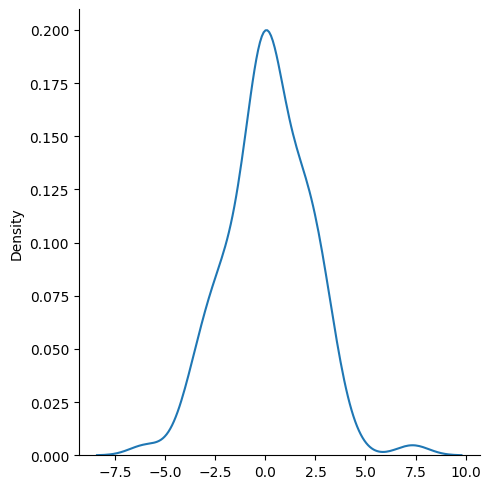

In [24]:
# Plot residuals
sns.displot(residuals, kind = 'kde');

Notice that our prediction values (`y_preds`) are not quitely linear with respect to our Ground Truth label (`y_test`).

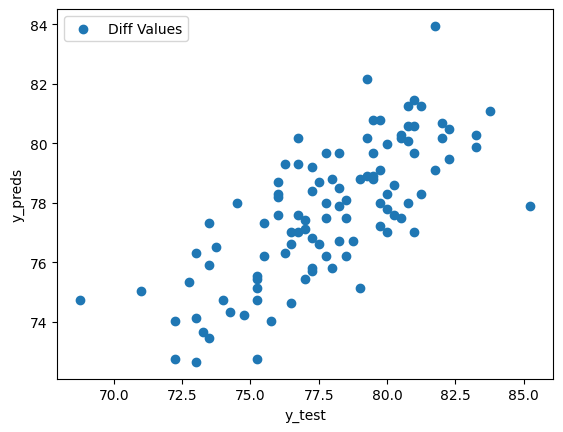

In [25]:
# Scatter plot with respect to prediction and residuals
plt.scatter(x = y_test, y = y_preds, label = 'Diff Values')
plt.xlabel('y_test')
plt.ylabel('y_preds')
plt.legend()
plt.show();

Let's try creating a DNN model for this linear regression problem. We will use a two layers NN with a sigmoid function for each.

In [26]:
X_train_transformed.shape

(412, 1)

In [60]:
# Create a DNN Model using Keras Subclassing
import tensorflow as tf
import numpy as np


class LinearRegressionModel_DNN(tf.keras.Model):
    def __init__(self):
        super(LinearRegressionModel_DNN, self).__init__()
        self.dense = tf.keras.layers.Dense(1, input_shape=(1,), kernel_initializer='ones', bias_initializer='zeros')

    def call(self, inputs):
        return self.dense(inputs)

# Instantiate the model
model = LinearRegressionModel_DNN()

# Compile the model with a mean squared error loss function and an optimizer
model.compile(optimizer='sgd', 
              loss='mean_squared_error',
              metrics = ['mse'])

# Train the model
history = model.fit(X_train_transformed, 
          y_train, 
          validation_data= (X_test_transformed, y_test),
          epochs=30, verbose=2)

Epoch 1/30
13/13 - 0s - loss: 4794.0493 - mse: 4794.0493 - val_loss: 3586.8191 - val_mse: 3586.8191 - 210ms/epoch - 16ms/step
Epoch 2/30
13/13 - 0s - loss: 2836.6799 - mse: 2836.6799 - val_loss: 2125.7434 - val_mse: 2125.7434 - 25ms/epoch - 2ms/step
Epoch 3/30
13/13 - 0s - loss: 1679.8918 - mse: 1679.8918 - val_loss: 1260.7476 - val_mse: 1260.7476 - 24ms/epoch - 2ms/step
Epoch 4/30
13/13 - 0s - loss: 995.3026 - mse: 995.3026 - val_loss: 749.2077 - val_mse: 749.2077 - 24ms/epoch - 2ms/step
Epoch 5/30
13/13 - 0s - loss: 590.6418 - mse: 590.6418 - val_loss: 446.1282 - val_mse: 446.1282 - 23ms/epoch - 2ms/step
Epoch 6/30
13/13 - 0s - loss: 351.1953 - mse: 351.1953 - val_loss: 266.5070 - val_mse: 266.5070 - 25ms/epoch - 2ms/step
Epoch 7/30
13/13 - 0s - loss: 209.5844 - mse: 209.5844 - val_loss: 160.0860 - val_mse: 160.0860 - 25ms/epoch - 2ms/step
Epoch 8/30
13/13 - 0s - loss: 125.9352 - mse: 125.9352 - val_loss: 97.0162 - val_mse: 97.0162 - 24ms/epoch - 2ms/step
Epoch 9/30
13/13 - 0s - loss

In [51]:
# Make predictions
y_preds = model.predict(X_test)

print("Model Summary:")
model.summary()

4/4 [==============================] - 0s 878us/step
Model Summary:
Model: "linear_regression_model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            multiple                  2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [52]:
print("\nPredictions:")
print(y_preds[:5])


Predictions:
[[611.946 ]
 [549.8074]
 [567.2062]
 [597.0327]
 [597.0327]]


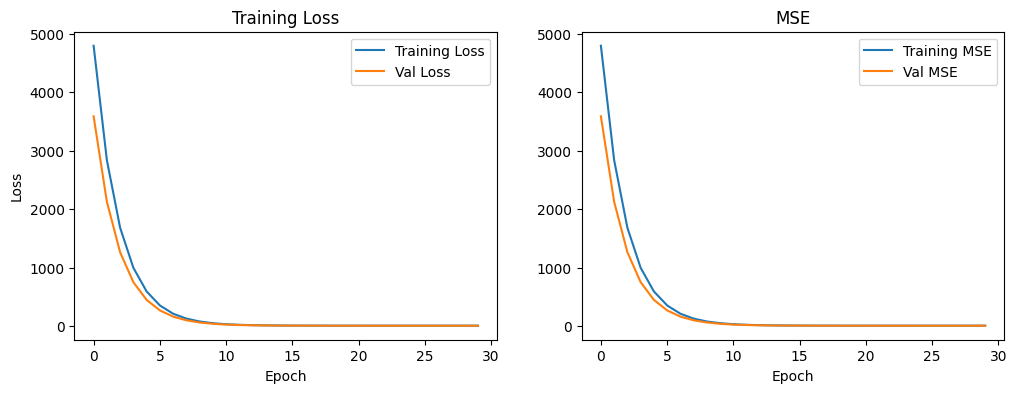

In [61]:
# Plot the model
import matplotlib.pyplot as plt

plt.figure(figsize = (12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label = 'Training Loss')
plt.plot(history.history['val_loss'], label = 'Val Loss')
plt.xlabel('Epoch')
plt.title('Training Loss')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['mse'], label = 'Training MSE')
plt.plot(history.history['val_mse'], label = 'Val MSE')
plt.xlabel('Epoch')
plt.title('MSE')
plt.legend()
plt.show()

In [68]:
# Let's get the model's weights
model.layers[0].get_weights()

[array([[2.4824824]], dtype=float32), array([77.52063], dtype=float32)]

In [69]:
weights, biases = model.layers[0].get_weights()
slope = weights[0][0]
intercept = biases[0]

print("Slope (Coefficient):", slope)
print("Intercept:", intercept)

Slope (Coefficient): 2.4824824
Intercept: 77.52063


Conclusion: We can see that we have the same output from the 3 models (OLS, Linear Regression & the custom linear reg model using keras subclassing).